In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [36]:
students = pd.read_excel("Student_performance1.xlsx")
print(students)

    Access_no  gender   age            course  DSC3108  DSC3114  MTH3108  \
0     Q104895  Female  21.0       Engineering   1000.0     88.0      NaN   
1     J499692    Male  35.0       Engineering     71.0     77.0     90.0   
2     F664488  Female  22.0       Engineering     90.0     83.0     80.0   
3     L070268    Male  32.0       Engineering     83.0     80.0     77.0   
4     F695622    Male  27.0  Computer Science     79.0     83.0     64.0   
..        ...     ...   ...               ...      ...      ...      ...   
295   N524494    Male  35.0       Engineering     94.0     53.0     96.0   
296   Y193431    Male   NaN       Mathematics      NaN     52.0     63.0   
297   R876132  Female  40.0  Computer Science     66.0     95.0     78.0   
298   A471182    Male  36.0          Business     67.0     71.0     86.0   
299   J728737    Male  40.0          Business     73.0     58.0      NaN   

     SYE3104  
0       94.0  
1       76.0  
2        NaN  
3       97.0  
4       58.0

In [37]:
print(students.describe(include="all"))
##this gives me summary statistis of all columns(categorical/continuous) such as mean,median,count,std,quartiles.

       Access_no gender         age       course      DSC3108      DSC3114  \
count        300    272  269.000000          300   292.000000   283.000000   
unique       300      2         NaN            4          NaN          NaN   
top      J728737   Male         NaN  Mathematics          NaN          NaN   
freq           1    138         NaN           85          NaN          NaN   
mean         NaN    NaN   30.773234          NaN    80.301370    93.466431   
std          NaN    NaN   13.071726          NaN    56.682012   293.126195   
min          NaN    NaN    5.000000          NaN     0.000000    50.000000   
25%          NaN    NaN   23.000000          NaN    64.000000    63.000000   
50%          NaN    NaN   30.000000          NaN    77.000000    76.000000   
75%          NaN    NaN   36.000000          NaN    90.000000    90.000000   
max          NaN    NaN  120.000000          NaN  1000.000000  5000.000000   

           MTH3108      SYE3104  
count   283.000000   286.0000

In [7]:
students.shape
##Shape gives me 300 rows and 8 columns

(300, 8)

In [8]:
##checking for missing values
students.isna().sum()

Access_no     0
gender       28
age          31
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

In [9]:
students.head(6)

,Access_no,gender,age,course,DSC3108,DSC3114,MTH3108,SYE3104
0,Q104895,Female,21.0,Engineering,1000.0,88.0,NaN,94.0
1,J499692,Male,35.0,Engineering,71.0,77.0,90.0,76.0
2,F664488,Female,22.0,Engineering,90.0,83.0,80.0,NaN
3,L070268,Male,32.0,Engineering,83.0,80.0,77.0,97.0
4,F695622,Male,27.0,Computer Science,79.0,83.0,64.0,58.0
5,X888993,Female,34.0,Mathematics,97.0,65.0,50.0,NaN


In [74]:
##Dealing with categorical missing values
##we can use forward or backword fill
students["gender"] = students["gender"].ffill()
students["gender"].isna().sum()

np.int64(0)

In [11]:
students.isna().sum()

Access_no     0
gender        0
age          31
course        0
DSC3108       8
DSC3114      17
MTH3108      17
SYE3104      14
dtype: int64

In [25]:
##creating numerical data
num_data = students.select_dtypes(exclude="object")

In [66]:
def visual(data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(data.columns):
        if data[col].dtype in ['float64','int64']:
            plt.subplot(4,4, i+1)
            sns.histplot(data[col])
            plt.title(col)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

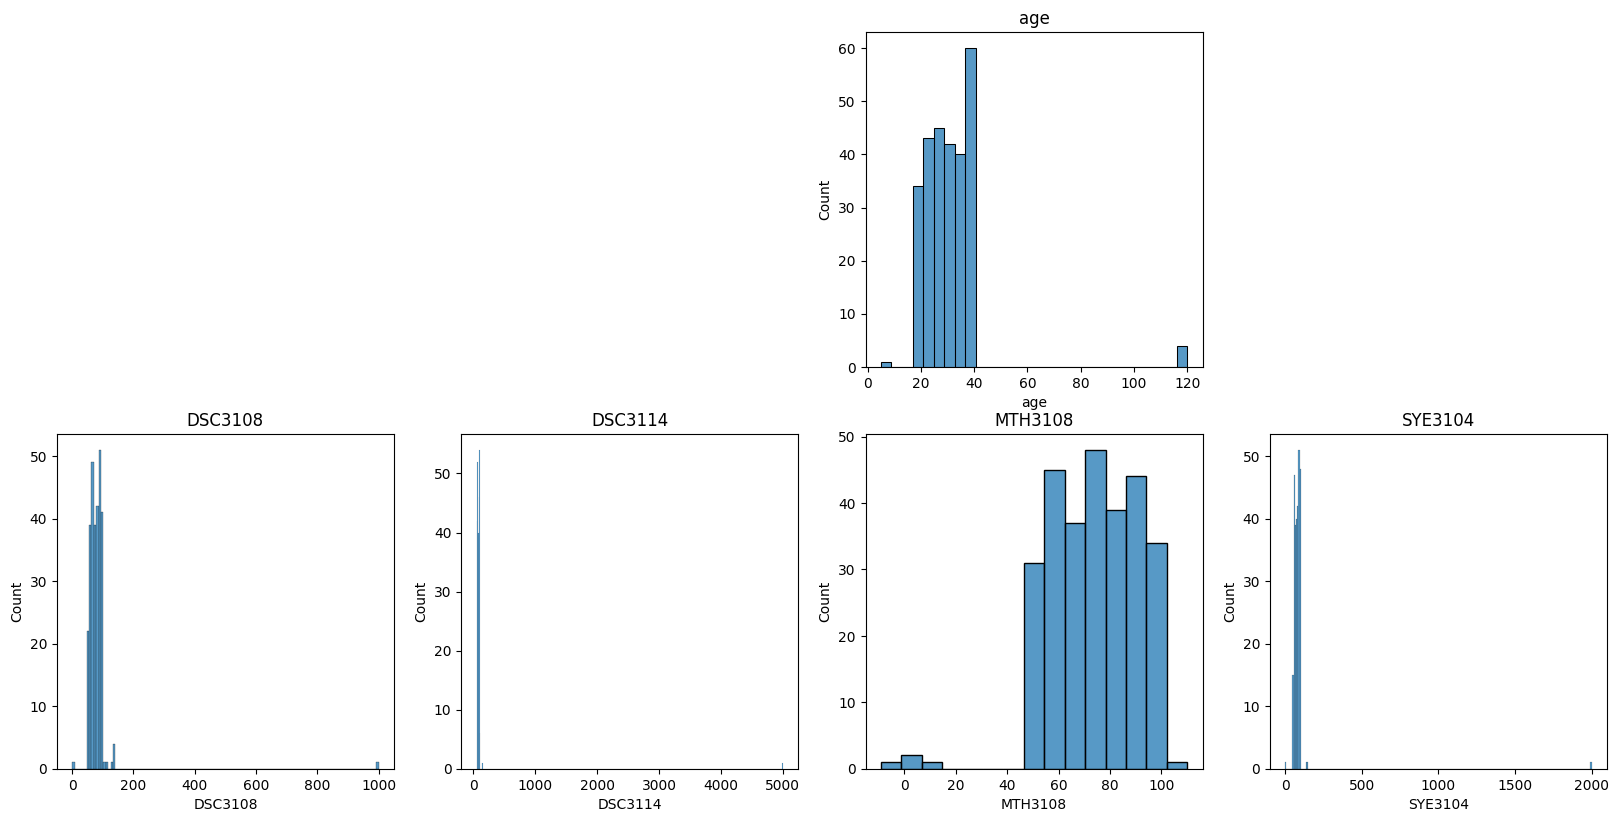

In [62]:
visual(students)

In [68]:
##Dealing with missing values in age
students["age"] = students["age"].fillna(students["age"].median())
students["age"].isna().sum()

np.int64(0)

In [75]:
##creating a function to remove missing values
def remove_missing_values(data):
    for col in data.columns:
        if data[col].dtype in ['float64','int64']:
            data[col] = data[col].fillna(data[col].median())

In [76]:
remove_missing_values(students)
students.isna().sum()

Access_no    0
gender       0
age          0
course       0
DSC3108      0
DSC3114      0
MTH3108      0
SYE3104      0
dtype: int64

In [91]:
##plotting boxplots 
def visual1(data):
    plt.figure(figsize=(20,20))
    for i, col in enumerate(data.columns):
        if data[col].dtype in ['float64','int64']:
            plt.subplot(4,4,i+1)
            sns.boxplot(data[col])
            plt.title(col)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

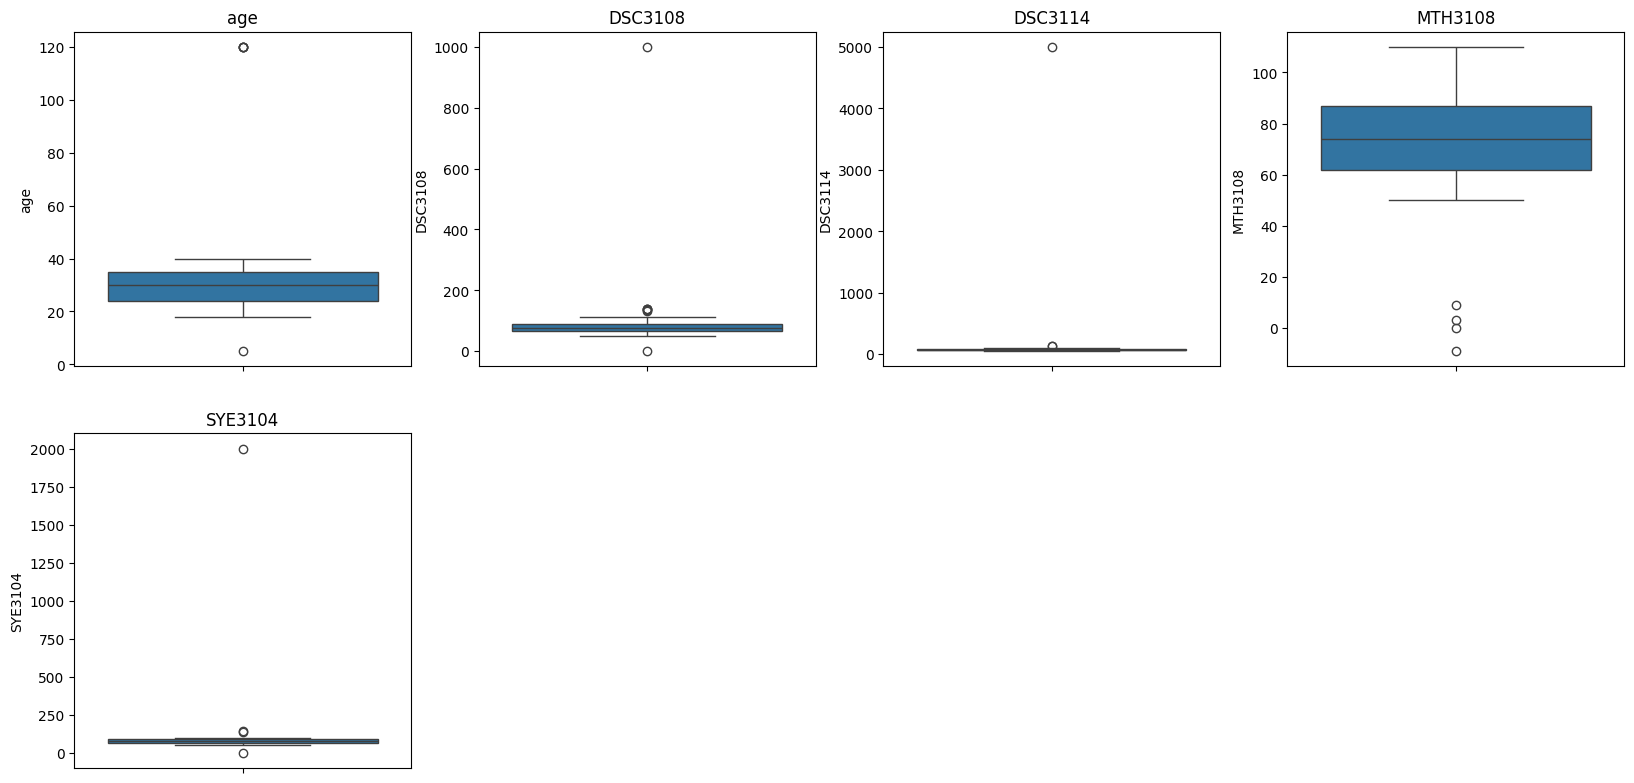

In [92]:
visual1(num_data)

In [114]:
##dealing with outliers
def remove_outliers(data):
    for col in data.columns:
        if data[col].dtype in ['float64','int64']:
            q1 = data[col].quantile(0.25)
            q3 = data[col].quantile(0.75)
            iqr = q3 - q1
            lowerbound = q1 - (1.5 * iqr)
            upperbound = q3 + (1.5 * iqr)

            data[col] = np.where(data[col] > upperbound,upperbound,data[col])
            data[col] = np.where(data[col] < lowerbound,lowerbound,data[col])
    

In [115]:
remove_outliers(students)

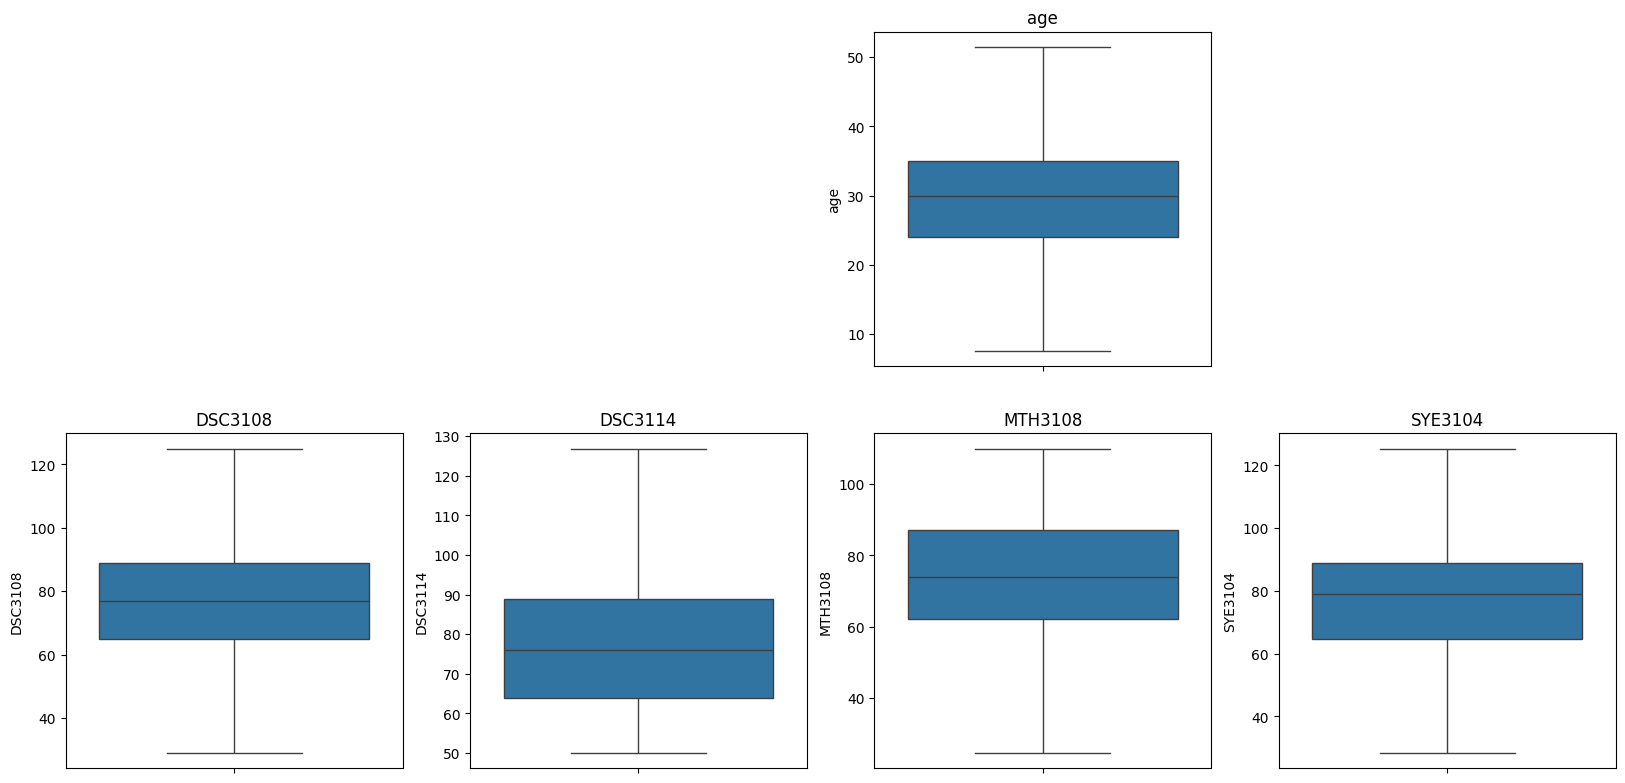

In [113]:
visual1(students)